In [1]:
from cvfwVer2 import CVFW_MODEL, CVFW_UPDATE

In [2]:
model = CVFW_MODEL(dsize = (64, 64))
model.add_directory(class_name="with mask", path = "C:/kimdonghwan/python/CVFW/image/mask/train/with_mask")
model.add_directory(class_name="without mask", path = "C:/kimdonghwan/python/CVFW/image/mask/train/without_mask")

model.train()

without mask: 100%|███████████████████████████████████████████████████████████████| 4096/4096 [00:23<00:00, 171.59it/s]


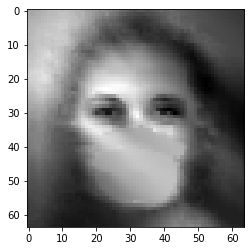

In [3]:
import matplotlib.pyplot as plt

modeling = model.modeling(class_name="with mask")
plt.imshow(modeling, cmap='gray')

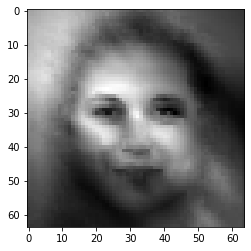

In [4]:
modeling = model.modeling(class_name="without mask")
plt.imshow(modeling, cmap='gray')

[0.5018381224718444, 0.4981618775281556]


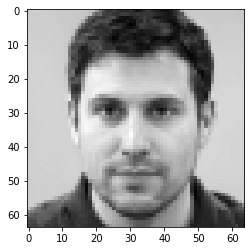

In [5]:
import cv2

img = cv2.cvtColor(cv2.imread("C:/kimdonghwan/python/CVFW/image/mask/test/without_mask/(3001).png"), cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')
print(model.modeling_predict_class(img.flatten().tolist()))

[0.49591444536692086, 0.5040855546330792]


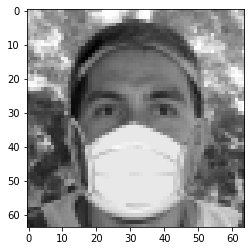

In [6]:
import cv2

img = cv2.cvtColor(cv2.imread("C:/kimdonghwan/python/CVFW/image/mask/test/with_mask/(3001).png"), cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')
print(model.modeling_predict_class(img.flatten().tolist()))

In [8]:
from os import listdir
import numpy as np

count = 0
answer = 0

with_mask_files = listdir("C:\\kimdonghwan\\python\\CVFW\\image\\mask\\test\\with_mask")
without_mask_files = listdir("C:\\kimdonghwan\\python\\CVFW\\image\\mask\\test\\without_mask")

for file in with_mask_files:
    img = cv2.cvtColor(cv2.imread(f"C:\\kimdonghwan\\python\\CVFW\\image\\mask\\test\\with_mask\\{file}", 1), cv2.COLOR_BGR2GRAY).flatten().tolist()
    
    predict = model.modeling_predict_class(img)
    if min(predict) == predict[0]: answer += 1
    count += 1
    
    
for file in without_mask_files:
    img = cv2.cvtColor(cv2.imread(f"C:\\kimdonghwan\\python\\CVFW\\image\\mask\\test\\without_mask\\{file}", 1), cv2.COLOR_BGR2GRAY).flatten().tolist()
    
    predict = model.modeling_predict_class(img)
    if min(predict) == predict[1]: answer += 1
    count += 1

    
print(answer / count)

0.9866666666666667
